In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**1st exercise** -A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [5]:
# Import Data Set
cutlets=pd.read_csv("/content/Cutlets.csv")

In [6]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
# we have a significance of 5%
# as we are carring 2 tail test which means 5/2, alpha = 0.025

# Now if the p value is greater than alpha value then we will accept the null hypothesis, i.e unit A = unit B
# similarly if p value is less than alpha value then we will accept the null hypothesis, i.e unit A != unit B

# Null hypothesis ho= unit A = Unit B
# Alternative hypothesis ha= Unit A != unit B

In [7]:
p_value=stats.ttest_ind(cutlets["Unit A"],cutlets["Unit B"])
P_value=p_value[1]

In [8]:
P_value

0.4722394724599501

In [9]:
#We fail to reject null hypothesis

<function matplotlib.pyplot.show(close=None, block=None)>

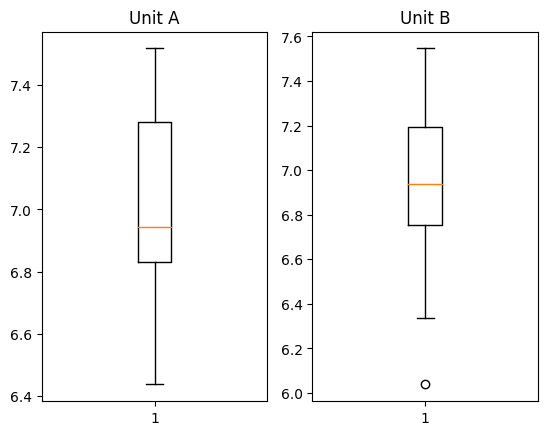

In [10]:
# Plotting outliers by boxplot

plt.subplot(121) # 121 -1 row, 2 column, unit a will be in 1st row of 1st column
plt.boxplot(cutlets["Unit A"])
plt.title("Unit A")
plt.subplot(122)
plt.boxplot(cutlets["Unit B"])
plt.title("Unit B")
plt.show

# 1st exercise Assumption - By analysing the data of both unit, we can assume that both unit A and unit B are there is no significant difference in the diameter of the cutlet between the two units and by the median above the boxplot we can say that the median lies in between of 6.8 to 7

2 A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.

Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [11]:
lab=pd.read_csv("/content/LabTAT.csv")

In [12]:
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [13]:
# As we have more than 3  independent variables we will carry ANOVA test
# since we are caring  ANOVA the significance will be 5%, Alpha= 0.05

# Null hypothesis Ho= Laboratory 1=Laboratory=2=Laboratory=3=Laboratory 4
# Alternative hypothesis Ha= Atlest one is different

In [14]:
# f_oneway - one way ANOVA
p_value=stats.f_oneway(lab["Laboratory 1"],lab["Laboratory 2"],lab["Laboratory 3"],lab["Laboratory 4"])
P=p_value[1]

In [15]:
P

2.1156708949992414e-57

In [16]:
alpha=0.05

if P < alpha:
  print("We reject the null hypothesis,as there is significant diffence in average TAT of laboratories")

else:
  print("We fail to reject the null hypothesis")

We reject the null hypothesis,as there is significant diffence in average TAT of laboratories


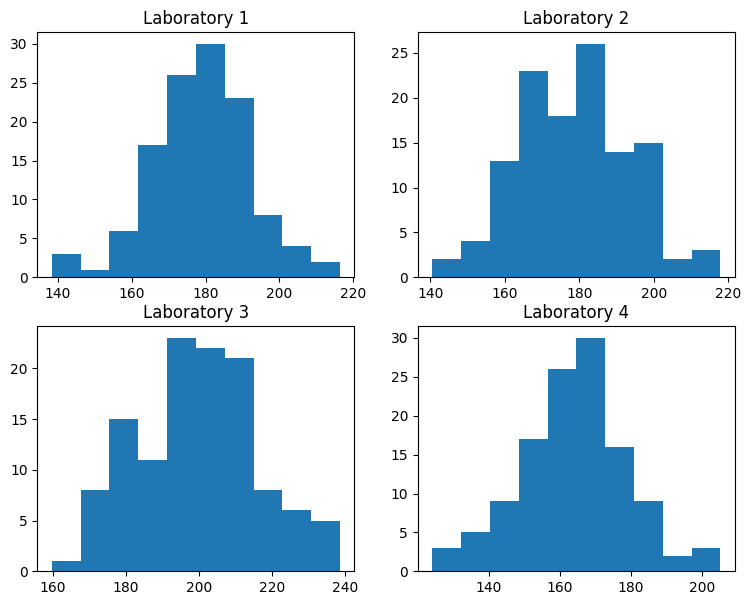

In [18]:
# plotting histogram of all 4 labs

plt.figure(figsize=(9,7))
plt.subplot(221)  #221- 2 row, 2 column 5
plt.hist(lab["Laboratory 1"])
plt.title("Laboratory 1")

plt.subplot(222)
plt.hist(lab["Laboratory 2"])
plt.title("Laboratory 2")

plt.subplot(223)
plt.hist(lab["Laboratory 3"])
plt.title("Laboratory 3")

plt.subplot(224)
plt.hist(lab["Laboratory 4"])
plt.title("Laboratory 4")
plt.show()

# 2 exercise Assumption- By analysing the data with above outcome we can say that there is a difference in average TAT among the different laboratories at 5% significance level, which mean that laboratories need to take necessary action in order to maintain the average TAT

# **3 exercise**

-Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [20]:
# As we are 2 categorical data we will run Chi2

# null hypothesis Ho=  male-female buyer rations are similar across regions.
# Alternative hypothesis = male-female buyer rations are not similar across regions.


buyer=pd.read_csv("/content/BuyerRatio.csv")
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [21]:
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [22]:
tab=np.array([[50,142,131,70],[435,1523,1356,750]])
tab

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [23]:
from scipy.stats import chi2_contingency
p_value=chi2_contingency(tab)
p_value

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [24]:
#Extracting p value
Pvalue=p_value[1]
Pvalue

0.6603094907091882

In [25]:
Alpha=0.05
if Pvalue < Alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject null hypothesis, which means male-female buyer rations are similar across regions.")

We fail to reject null hypothesis, which means male-female buyer rations are similar across regions.


# **Excersie 4**

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [26]:
form=pd.read_csv("/content/Costomer+OrderForm.csv")

In [27]:
form.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [28]:
## Ay analauzing the data its seems we have 2 independent variables so will perform Chi2

## Null Hypothesis Ho= Defective percent does not varies
## Alternative Hypothesis Ha= Defective percent varies

In [29]:
form.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [30]:
# Checking the value counts
form.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [31]:
form.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [32]:
form.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [33]:
tab=np.array([[271,267,269,280],[29,33,31,20]])
tab

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [34]:
P_value=chi2_contingency(tab)
P_value

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

In [35]:
pvalue=P_value[1]
pvalue

0.2771020991233135

In [36]:
Alpha=0.05
if pvalue < Alpha:
  print("We reject the null hypothesis")
else:
  print("We accept to reject null hypothesis, as defective percent does not varies across the globe")

We accept to reject null hypothesis, as defective percent does not varies across the globe
